In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
os.chdir('C:\\Users\\steve\\OneDrive\\Data Science MSc\\MSc Project') # get to the right directory

##### Exploring the Data

In [48]:
# import data and show head
df = pd.read_csv('THIS_IS_IT.csv')
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,377981,4139,Control,M,81,1,MRI,Axial PD-T2 TSE FS,Original,04/09/2013,DCM,NaN
1,436432,4136,PD,M,57,5,MRI,Axial PD-T2 TSE FS,Original,05/06/2014,DCM,NaN
2,377973,4136,PD,M,56,1,MRI,Axial PD-T2 TSE FS,Original,2/28/2013,DCM,NaN
3,377952,4135,PD,M,67,1,MRI,Axial PD-T2 TSE FS,Original,03/01/2013,DCM,NaN
4,377945,4085,Control,M,67,1,MRI,Axial PD-T2 TSE FS,Original,04/08/2013,DCM,NaN


In [49]:
descriptions_array = df.Description.values
np.unique(descriptions_array, return_counts=True) 

(array(['AXIAL PD-T2 TSE FS', 'Axial PD-T2 TSE', 'Axial PD-T2 TSE FS',
        'Axial PD-T2 TSE_AC PC line', 'Axial PD-T2 TSE_AC/PC line',
        'Axial PD-T2-FS TSE', 'T2'], dtype=object),
 array([ 33, 292, 356,   2,  24,  23,   1], dtype=int64))

So we can see that the majority is Axial PD-T2 TSE and Axial PD-T2 TSE FS, leaving us with 292 or 356. 

In [50]:
# looks like a bunch of Axial PD-T2 TSE are mislabelled or slightly different, change these
dscrptn = df['Description'].replace({'Axial PD-T2-FS TSE':'Axial PD-T2 TSE FS', 'AXIAL PD-T2 TSE FS':'Axial PD-T2 TSE FS', 
                           'Axial PD-T2 TSE_AC PC line':'Axial PD-T2 TSE_AC/PC line'})

df['Description'] = dscrptn

In [51]:
np.unique(df.Description.values, return_counts=True) 

(array(['Axial PD-T2 TSE', 'Axial PD-T2 TSE FS',
        'Axial PD-T2 TSE_AC/PC line', 'T2'], dtype=object),
 array([292, 412,  26,   1], dtype=int64))

Looks about right, decide to go with TSE FS as this has more data. Looks like many patients had both scans.

In [53]:
df2 = df[df['Description']=='Axial PD-T2 TSE FS']
print (len(df2))
df2.tail()

412


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
718,491583,3106,Control,F,74,11,MRI,Axial PD-T2 TSE FS,Original,3/30/2015,DCM,NaN
722,491575,3105,PD,M,73,9,MRI,Axial PD-T2 TSE FS,Original,3/30/2015,DCM,NaN
723,491576,3105,PD,M,73,9,MRI,Axial PD-T2 TSE FS,Original,3/30/2015,DCM,NaN
724,372314,3105,PD,M,71,7,MRI,Axial PD-T2 TSE FS,Original,4/18/2013,DCM,NaN
729,378210,3102,PD,M,66,7,MRI,Axial PD-T2 TSE FS,Original,02/06/2013,DCM,NaN


In [58]:
df2.info() # just get understanding of types of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 729
Data columns (total 12 columns):
Image Data ID    412 non-null int64
Subject          412 non-null int64
Group            412 non-null object
Sex              412 non-null object
Age              412 non-null int64
Visit            412 non-null int64
Modality         412 non-null object
Description      412 non-null object
Type             412 non-null object
Acq Date         412 non-null object
Format           412 non-null object
Downloaded       0 non-null float64
dtypes: float64(1), int64(4), object(7)
memory usage: 61.8+ KB


In [94]:
# count number with PD and number of controls
np.unique(df2.Group, return_counts=True)

(array(['Control', 'PD'], dtype=object), array([ 50, 362], dtype=int64))

We can see that some patients have multiple scans and different dates. Treat these as independent occurances. 
<br>
Plan:
-  Get all subject ID's
-  Search these folders, if more than 1 subfolder, take the second which will be the TSE FS files
-  Then each scan subfolder is treated as an independent case (important to mention) as we have 412 patients but 729 scans i.e. some patients had more than one scan over time

In [54]:
df_control = df2[df2.Group == 'Control']
df_pd = df2[df2.Group == 'PD']

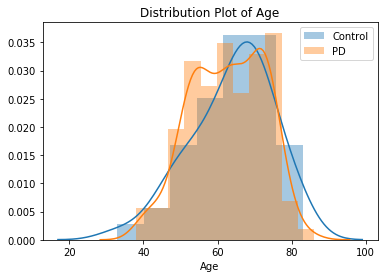

In [47]:
# seaborn distribution plot
sns.distplot(df_control.Age, rug=False, label='Control')
sns.distplot(df_pd.Age, rug=False, label='PD')
plt.title('Distribution Plot of Age')
plt.legend()
plt.show()

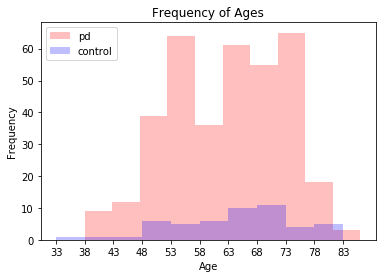

In [96]:
# plot for the ages
plt.hist(df_pd.Age, align='mid', alpha=0.25, color='r', label='pd', bins=10)
plt.hist(df_control.Age, align='mid', alpha=0.25, color='b', label='control', bins=10)
plt.legend(loc='upper left')

# set labels
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Frequency of Ages')

# set ticks
plt.xticks(np.arange(min(df_control.Age), max(df_control.Age)+1, 5.0))
plt.show()

##### Changing working directory to access the images, Test a DICOM File for now

In [9]:
# have to dive into the file system to do that.. (on AWS have it all accessed on the bucketz)
import pydicom
from pydicom.data import get_testdata_files

In [10]:
# os.chdir('C:\\Users\\steve\Downloads\PPMI_THIS_IS_IT')
os.chdir('C:\\Users\\steve\Downloads')
os.getcwd()

'C:\\Users\\steve\\Downloads'

In [11]:
# pydicom.read_file("PPMI_3113_MR_Axial_PD-T2_TSE_FS_br_raw_20131008152954645_93_S203292_I393644.dcm")

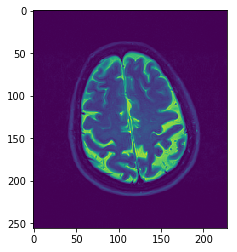

In [12]:
slices = pydicom.read_file("PPMI_3113_MR_Axial_PD-T2_TSE_FS_br_raw_20131008152954645_93_S203292_I393644.dcm")
plt.imshow(slices.pixel_array)
plt.show()